# Roteiro1: Familiarização com a biblioteca grafos.py
por: Iury Coelho



Este notebook abrange o processamento de funções sujeridas nas atividades do roteiro 1 da disciplina teoria dos grafos do curso de engenharia da computação do - IFPB. A partir da representação de um grafo construido sob a pespectiva do mapa da Paraíba são apresentadas instruções pertinentes à teoria dos grafos. Outrossim é a utilização da biblioteca networkX para exibir o desenho do gráfo e assim melhor favorecer o entendimento a paritr de uma representação geometrica.

# 1. Grafo da Paraíba


![alt text](image/grafoPb.png "Grafo da Paraíba")







No exemplo acima, os vértices representam cidades e as arestas indicam se é possível chegar a outra cidade por uma estrada.
Dessa forma, esse grafo pode ser escrito da seguinte forma:
N = {J, C, E, P, M, T, Z}
A = {a1, a2, a3, a4, a5, a6, a7, a8, a9}
g(a1) = JC, g(a2) = CE, g(a3) = CE, 
g(a4) = CP, g(a5) = CP, g(a6) = CM, g(a7) = CT, g(a8) = MT, g(a9) = TZ

# 2. Construindo o grafo da Paraíba 
A partir das informações acima, contrua o grafo da Paraíba usando o módulo grafo.py e imprima-o na saída padrão.

In [229]:
#Importe as bibliotecas necessárias 
from grafo import Grafo


In [402]:
# construa o grafo g_pb
g_pb = Grafo(['J', 'C', 'E', 'P', 'M', 'T', 'Z'], 
             {'a1':'J-C', 'a2':'C-E', 'a3':'C-E', 'a4':'C-P', 'a5':'C-P', 'a6':'C-M', 'a7':'C-T', 'a8':'M-T', 'a9':'T-Z'})


In [383]:
# exiba o grafo construido
print(g_pb)

J, C, E, P, M, T, Z
J-C, C-E, C-E, C-P, C-P, C-M, C-T, M-T, T-Z


# 3. Desenhando o grafo da Paraiba
Desenhe o grafo da paraiba usando a biblioteca networkx

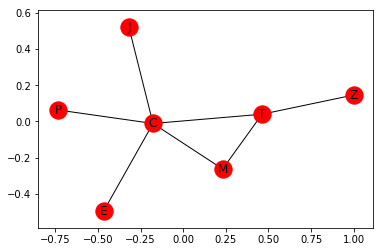

In [301]:
#importe as bibliotecas

import matplotlib.pyplot as plt
import networkx as nx

# construa os vértices grafo_pb
grafo_pb = nx.Graph()
grafo_pb.add_node('J')
grafo_pb.add_node('C')
grafo_pb.add_node('E')
grafo_pb.add_node('P')
grafo_pb.add_node('M')
grafo_pb.add_node('T')
grafo_pb.add_node('Z')


# construa as arestas do grafo_pb

grafo_pb.add_edge('J','C')
grafo_pb.add_edge('C','E')
grafo_pb.add_edge('C','E')
grafo_pb.add_edge('C','P')
grafo_pb.add_edge('C','P')
grafo_pb.add_edge('C','M')
grafo_pb.add_edge('C','T')
grafo_pb.add_edge('M','T')
grafo_pb.add_edge('T','Z')

# exiba o desenho do grafo
plt.figure()
nx.draw_networkx(grafo_pb)
plt.show()


# 4. Pares de vértices não adjacentes 
Crie uma  função em python que encontre todos os pares de vértices não adjacentes

In [384]:
#Crie a função para verificar vertices não adjacentes
def vertices_nao_adjacentes(self):
    '''
    Verifica os vertices não adjacentes
            '''
    completo = []
    nao_adj = []
    resultado = " "

    for x in self.N:
        for z in self.N:
            if (x + "-" + z) not in self.A.values() and (z + "-" + x) not in self.A.values() :
                if x != z:
                    if (z + "-" + x) not in completo :
                        completo.append(x + "-" + z)
                        resultado += ("\n" + x + "-" + z)
    return resultado
    


In [385]:
# Imprima os vertices não adjacentes do grafo
print(vertices_nao_adjacentes(g_pb))

 
J-E
J-P
J-M
J-T
J-Z
C-Z
E-P
E-M
E-T
E-Z
P-M
P-T
P-Z
M-Z


# 5. Vértice adjacente a ele mesmo
Em teoria dos grafos, um vértice 'A' é adjacente a um vétice 'B' se eles estiverem ligados por uma aresta. Ainda, existe o caso especial em que um vértice é adjacente a ele mesmo, chamamos de laço. Um laço une um vértice a ele próprio;


Crie uma função que verifique se o grafo possui algum vértice que  é adjacente a ele mesmo? (Retorne True ou False)


In [223]:
def ha_laco(self):

    for i in self.A.values():
        p = i.split("-")
        if p[0] == p[1]:
            return False
            break
    return True

In [224]:
ha_laco(g_pb)

True

# 6. Arestas paralelas
Quando uma duas ou mais arestas possuim o mesmo vértice-inicial 'A' e o mesmo vértice final 'B', elas são ditas paralelas.


![alt text](image/arestaParalela.png "Dois vértices ligados por arestas paralelas")

Crie uma função que reitorne True se o grafo possui arestas paralelas e false caso não possua

In [397]:
def ha_paralelas(self):
    num_arestas = len(self.A.values())
    lista_arestas = list(self.A.values())
    if ( num_arestas != 0 ):
        for i in range(num_arestas):
            x = lista_arestas[i]
            z = x[::-1]
            for j in lista_arestas:
                if ((j == z) or (lista_arestas.count(x) > 1)):
                    return True
        return False
    else:
        return False

In [410]:
# analise um grafo sem arestas paralas de teste
g_pb_1 = Grafo(['J', 'C', 'E', 'P', 'M', 'T', 'Z'], {'a1': 'J-C', 'a3': 'C-E', 'a4': 'C-P', 'a6': 'C-M', 'a7': 'C-T', 'a8': 'M-T', 'a9': 'T-Z'})
print(ha_paralelas(g_pb_1))

#imprima o grafo da Paraíba
print(ha_paralelas(g_pb))


False
True


# 7. Grau de um vértice 
O grau de um vértice é definido como a quantidade de seus vértices adjacentes.


Crie uma função que retorne o grau de um vértice arbitrário

In [339]:
def grau(vertice):
    arestas = g_pb.A.values()
    no = vertice
    print(" O grau do vertice " + no + " é:")
    grau = 0

    for j in arestas:
        p = j
        if no == p[0] and p[0] != p[2]:
            grau += 1

        if no == p[2] and p[2] != p[0]:
            grau += 1

    return grau

In [340]:
#Retorne o grau de um vértice qualquer
grau('C')

 O grau do vertice C é:


7

# 8. Arestas Incidentes
Crie uma função que retorne as arestas incidentes sobre um vértice N arbitrário

In [337]:
def arestas_sobre_vertice(self, vertice):
    
    arestas = self.A.values()
    no = vertice
    chave = self.A.keys()
    p = []
    incidente = " "
    contador = 0

    for i in chave:
        p.append(i)

    for j in arestas:
        z = j
        if no == z[0] and z[0] != z[2]:
            incidente += "{"
            incidente += p[contador]
            incidente += "}: "
            incidente += z
            incidente += "\n"

        if no == z[2] and z[2] != z[0]:
            incidente += "{"
            incidente += p[contador]
            incidente += "}: "
            incidente += z
            incidente += "\n "

        contador += 1

    return incidente

In [338]:
#Exiba as arestas que inicidem num vértice qualquer
print(arestas_sobre_vertice(g_pb,'J'))

 {a1}: J-C



# 9. Grafos completos
Um grafo é dito completo  se ele não possui laços nem arestas paralelas além de todo vértice ser adjacente a todos os outros vértices.

In [393]:
def separador_vertice(arestas):
    
    adjacente = []
    arestas = g_p.A.values()
    

    for j in arestas:
        p = j

        if (p[0] != p[2]) and p[0] not in adjacente:
            adjacente.append(p[0])
        if (p[2]) not in adjacente:
            adjacente.append(p[2])

    return adjacente

def eh_completo(self):

    completo = True
    v = separador_vertice(self.A.values())

    for x in v:
        for z in v:
            if (x + "-" + z) in self.A.values() or (z + "-" + x) in self.A.values():
                completo = True
            elif x != z:
                completo = False
                break
    return completo

In [406]:
#imprima um grafo completo de teste 
g_p = Grafo(['J', 'C', 'E', 'P'], {'a1':'J-C', 'a3':'J-E', 'a4':'J-P', 'a6':'C-E', 'a7':'C-P', 'a8':'E-P'})
print(eh_completo(g_p))

#imprima o grafo da Paríba
print(eh_completo(g_pb))

True
False
